<h1><center>Data Science Pipeline Tutorial</center></h1>

<h5><center>By Elan Haims and Jason Zhang</center></h5>

<h1><center>Introduction</center></h1>

In this tutorial, we will be walking you through the steps of retreiving, managing, and representing data. We will then show you how to perform analysis on that data along with hypothesis testing and machine learning. <br> For this tutorial, we will be using a dataset from https://github.com/jamesqo/gun-violence-data that has over 200,000 datapoints for gun violence in the United States to show you each step of the data science pipeline.  

## Setting up the environment

Our first step is to install all of the necessary modules to run our project. We will be using pandas to store and manage our data along with matplotlib to represent and visualize that data with plots.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import re

## Retreiving the Data

Now that we have our environment set up we need to retreive our data. Our dataset is stored as "gun_violence_data.csv" in the same directory as this Jupyter Notebook. <br> We can then use the "read_csv()" function from pandas to load that dataset into our notebook and stores it as a DataFrame.

In [20]:
df = pd.read_csv("gun_violence_data.csv", low_memory=False)
# Our dataset is very large so we will limit it to the first 10,000 rows
df = df.head(32000)
# Shows the first few rows of our dataset
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105.0,1/1/2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0.0,4.0,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726.0,1/1/2013,California,Hawthorne,13500 block of Cerise Avenue,1.0,3.0,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855.0,1/1/2013,Ohio,Lorain,1776 East 28th Street,1.0,3.0,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925.0,1/5/2013,Colorado,Aurora,16000 block of East Ithaca Place,4.0,0.0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959.0,1/7/2013,North Carolina,Greensboro,307 Mourning Dove Terrace,2.0,2.0,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


## Cleaning Up the Data

### Removing Extra Columns

We have our data, but as you can see it is very messy. The first step we will take to make our data easier to manage and analyze is to remove all of the unnecessary columns. <br> While having many columns can be beneficial because of the added datapoints, columns such as links to websites and names of people will not help in our analysis. <br> There are also columns that have many missing values so we will remove those as well to make our analysis easier.

In [21]:
# Drops columns from our dataframe
df = df.drop(columns = ["incident_url", "source_url", "incident_url_fields_missing", "address", 
"congressional_district", "sources", "state_house_district", "state_senate_district", "gun_stolen", 
"gun_type", "latitude", "longitude", "notes", "location_description", "incident_characteristics", 
"participant_age_group", "participant_name", "participant_relationship", "participant_status", "participant_type"])
# Displays the first few rows of the dataframe
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,participant_age,participant_gender
0,461105.0,1/1/2013,Pennsylvania,Mckeesport,0.0,4.0,NaN,0::20,0::Male||1::Male||3::Male||4::Female
1,460726.0,1/1/2013,California,Hawthorne,1.0,3.0,NaN,0::20,0::Male
2,478855.0,1/1/2013,Ohio,Lorain,1.0,3.0,2.0,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male
3,478925.0,1/5/2013,Colorado,Aurora,4.0,0.0,NaN,0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male
4,478959.0,1/7/2013,North Carolina,Greensboro,2.0,2.0,2.0,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female


### Removing Rows With Missing Values

Even though we already dropped the columns that contain many missing values, there are still some missing values in the remaining columns. <Br> If a datapoint is missing in the DataFrame, it will be represented as the string "nan", except for the "date" column which represents the missing value as a series of "#"s. <br> Since we have an abundance of datapoints, we can simply remove every row that has a missing value in any column. <br> To do this we will iterate through the DataFrame row by row and delete the row if we find a "nan" or "#". 

In [22]:
# Iterates through the DataFrame
for index, row in df.iterrows():
    # Retreives the value of the "n_guns_involved" column for the current row
    n_guns_involved = str(row["n_guns_involved"])
    # Retreives the value of the "date" column for the current row
    invalid_date = str(row["date"])
    # Retreives the value of the "participant_age" column for the current row
    participant_age = str(row["participant_age"])
    # Retreives the value of the "participant_gender" column for the current row
    participant_gender = str(row["participant_gender"])

    #Checks to make sure participant age follows the correct format
    participant_age_list = str.split(str(row["participant_age"]), "||")
    invalid_age_format = False
    for idx in range(len(participant_age_list)):
        part_age = participant_age_list[idx][3:].replace(':', '')
        if not re.match("^[0-9]+$", part_age):
            invalid_age_format = True

    # Checks for any missing values
    if n_guns_involved == "nan" or '#' in invalid_date or participant_age == "nan" or participant_gender == "nan" or invalid_age_format:
        # Drops the row from the DataFrame if there were any missing values
        df = df.drop(labels=index, axis=0)

# Resets the indices in the DataFrame 
df = df.reset_index(drop=True)
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,participant_age,participant_gender
0,478855.0,1/1/2013,Ohio,Lorain,1.0,3.0,2.0,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male
1,478959.0,1/7/2013,North Carolina,Greensboro,2.0,2.0,2.0,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female
2,479363.0,1/19/2013,New Mexico,Albuquerque,5.0,0.0,2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Male||1::Female||2::Male||3::Female||4::Fem...
3,491674.0,1/23/2013,Tennessee,Chattanooga,1.0,3.0,1.0,0::19,0::Male||1::Male||2::Male||3::Male
4,479413.0,1/25/2013,Missouri,Saint Louis,1.0,3.0,1.0,0::28,0::Male


## Manipulating the Data

Now that we have removed all of the unnecessary columns and missing values, we are almost ready to begin conducting analysis on the data. <br> Before we do that though, we should make our data look a little better. As you can see above, our "participant_age" and "participant_gender" values are stored as "0::(value)||1::(value)...and so on". <br> This is very difficult to perform analysis on because we cannot easily retrieve the data that we actually want. <br> To fix this, we will manipulate these columns and make it so they store an array of only the important data, i.e. the ages and genders.<br> For example, if before the value of "participant_age" for a certain row was "0::25||1::31||2::33||3::34||4::33", after our manipulation it will become "\[25, 31, 33, 34, 33]".	

In [23]:
df['date']= pd.to_datetime(df['date'])

# Iterates through the dataframe
for index, row in df.iterrows():
    # Split the participant age value into an array of values separated by '||'
    # Each index of the array should look something like: '::(value)'
    participant_age_list = str.split(str(row["participant_age"]), "||")
    # Iterate over that array of values
    for idx in range(len(participant_age_list)):
        # Remove the '::' 
        part_age = participant_age_list[idx][3:].replace(':', '')
        # Convert to value from string to integer
        participant_age_list[idx] = int(part_age)
        # Replace the value in the DataFrame with the new array of integer values
        df.at[index, "participant_age"] = participant_age_list

    # Split the participant gender value into an array of values separated by '||'
    # Each index of the array should look something like: '::(value)'
    participant_gender_list = str.split(str(row["participant_gender"]), "||")
    # Iterate over that array of values
    for idx in range(len(participant_gender_list)):
        # Remove the '::'
        participant_gender_list[idx] = participant_gender_list[idx][3:].replace(':', '')
        # Replace the value in the DataFrame with the new array of gender values
        df.at[index, "participant_gender"] = participant_gender_list

    # If for some reason the number of listed participant ages and genders are not equal, we remove the row from the DataFrame
    if len(participant_age_list) != len(participant_gender_list):
        df = df.drop(labels=index, axis=0)
# Reset the indices of the DataFrame
df = df.reset_index(drop=True)
df.head()


,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,participant_age,participant_gender
0,478855.0,2013-01-01,Ohio,Lorain,1.0,3.0,2.0,"[25, 31, 33, 34, 33]","[Male, Male, Male, Male, Male]"
1,478959.0,2013-01-07,North Carolina,Greensboro,2.0,2.0,2.0,"[18, 46, 14, 47]","[Female, Male, Male, Female]"
2,479363.0,2013-01-19,New Mexico,Albuquerque,5.0,0.0,2.0,"[51, 40, 9, 5, 2, 15]","[Male, Female, Male, Female, Female, Male]"
3,479413.0,2013-01-25,Missouri,Saint Louis,1.0,3.0,1.0,[28],[Male]
4,479603.0,2013-02-09,Louisiana,New Orleans,0.0,4.0,1.0,"[18, 22, 21, 29, 19, 22, 23]","[Male, Female, Female, Male, Male, Male, Male]"


### Adding a New Column to the DataFrame

Our data is now all cleaned up and ready to analyze. <br> One more thing that we can do to aid in our analysis is to add a new column that gives us the total number of participants involved. <br>Currently we can do that by retrieving the length of the participant_age or participant_gender array, but it is much better to have a new column in the DataFrame that tells us exactly how many people were involved.

In [24]:
# Initialize a new list
n_participants_list = []
# Iterate over the DataFrame
for index, row in df.iterrows():
    # Add the length of the "participant_age" array at that row to our number of participants list
    n_participants_list.append(len(row["participant_age"]))  
# Insert the 'n_participants_list' into the DataFrame with name 'n_participants' at index 7, so that it comes right before 'participant_age'
df.insert(7, 'n_participants', n_participants_list)
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,n_participants,participant_age,participant_gender
0,478855.0,2013-01-01,Ohio,Lorain,1.0,3.0,2.0,5,"[25, 31, 33, 34, 33]","[Male, Male, Male, Male, Male]"
1,478959.0,2013-01-07,North Carolina,Greensboro,2.0,2.0,2.0,4,"[18, 46, 14, 47]","[Female, Male, Male, Female]"
2,479363.0,2013-01-19,New Mexico,Albuquerque,5.0,0.0,2.0,6,"[51, 40, 9, 5, 2, 15]","[Male, Female, Male, Female, Female, Male]"
3,479413.0,2013-01-25,Missouri,Saint Louis,1.0,3.0,1.0,1,[28],[Male]
4,479603.0,2013-02-09,Louisiana,New Orleans,0.0,4.0,1.0,7,"[18, 22, 21, 29, 19, 22, 23]","[Male, Female, Female, Male, Male, Male, Male]"


### Analyzing the Data

Okay, now comes the fun part. With all the data that we have, what can we do with them? Well, let's answer some small questions first. 1) How often do gun incidents occur? 2) How significant are most gun incidents?

In [25]:
df.tail(10)

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,n_participants,participant_age,participant_gender
1464,812202.0,2014-08-16,Maine,Scarborough,0.0,0.0,1.0,1,[50],[Female]
1465,176595.0,2014-08-16,New York,Lewiston,0.0,1.0,1.0,2,"[16, 26]","[Female, Male]"
1466,175480.0,2014-08-16,Maryland,Temple Hills,2.0,0.0,1.0,2,"[3, 38]","[Female, Male]"
1467,177594.0,2014-08-17,Alabama,Birmingham,1.0,0.0,1.0,2,"[47, 30]","[Male, Male]"
1468,176257.0,2014-08-17,Ohio,Youngstown,1.0,0.0,1.0,2,"[17, 17]","[Male, Male]"
1469,175691.0,2014-08-17,Illinois,Chicago,1.0,0.0,1.0,1,[26],[Male]
1470,910958.0,2014-08-17,California,Tehachapi,1.0,0.0,1.0,3,"[38, 35, 24]","[Male, Female, Male]"
1471,176452.0,2014-08-17,Tennessee,Clarksville,1.0,0.0,1.0,1,[4],[Male]
1472,176634.0,2014-08-17,New Jersey,Roebling,0.0,0.0,1.0,3,"[24, 16, 24]","[Male, Male, Female]"
1473,176636.0,2014-08-17,Wisconsin,Green Bay,0.0,1.0,1.0,2,"[23, 17]","[Male, Male]"


Here we will calculate the frequency of the ages of people who participated in the shooting

In [26]:
age_count = [0] * 100
age_labels = []
for i in range(100):
    age_labels.append(str(i))
# Iterate through the dataframe
for i, j in df.iterrows():
    # For each participant_age value, add one to the frequency list
    for age in j[8]:
        if age < 100:
            age_count[age] += 1

Now we will plot the frequency data as a bar graph with age on the X-Axis and number of shootings on the Y-Axis

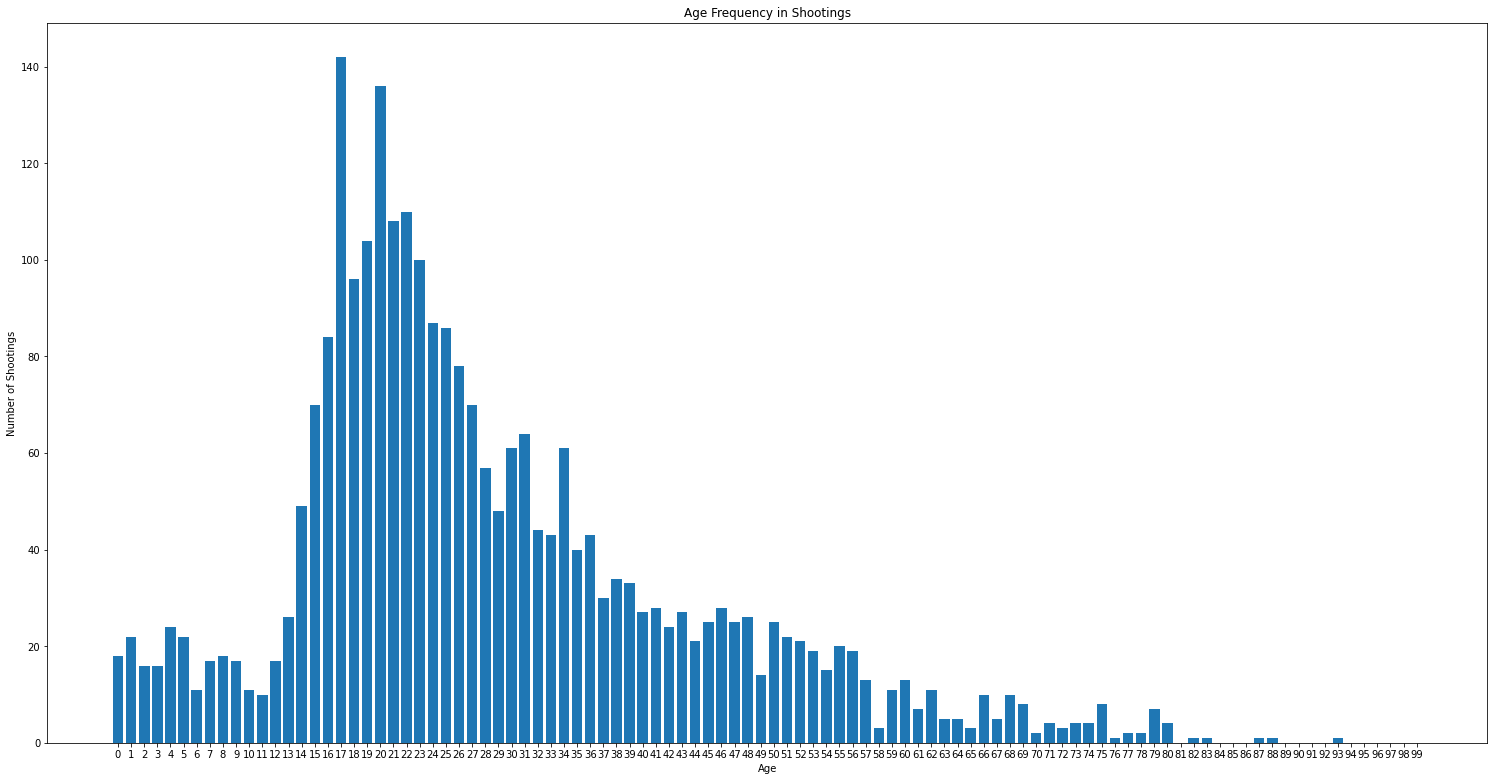

In [27]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(age_labels,age_count)
ax.set_title("Age Frequency in Shootings")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Shootings")
plt.show()

Now we will compute the gender frequency in the shootings. This is very similar to what we did above except we replace the participant age with the participant gender.

In [28]:
gender_count = [0,0]
gender_labels = ['Male','Female']
# Iterate through the DataFrame
for i, j in df.iterrows():
    # Increment the gender count for Male or Female based on the value of the row
    for gender in j[9]:
        if gender == 'Male':
            gender_count[0] += 1
        elif gender == 'Female':
            gender_count[1] += 1

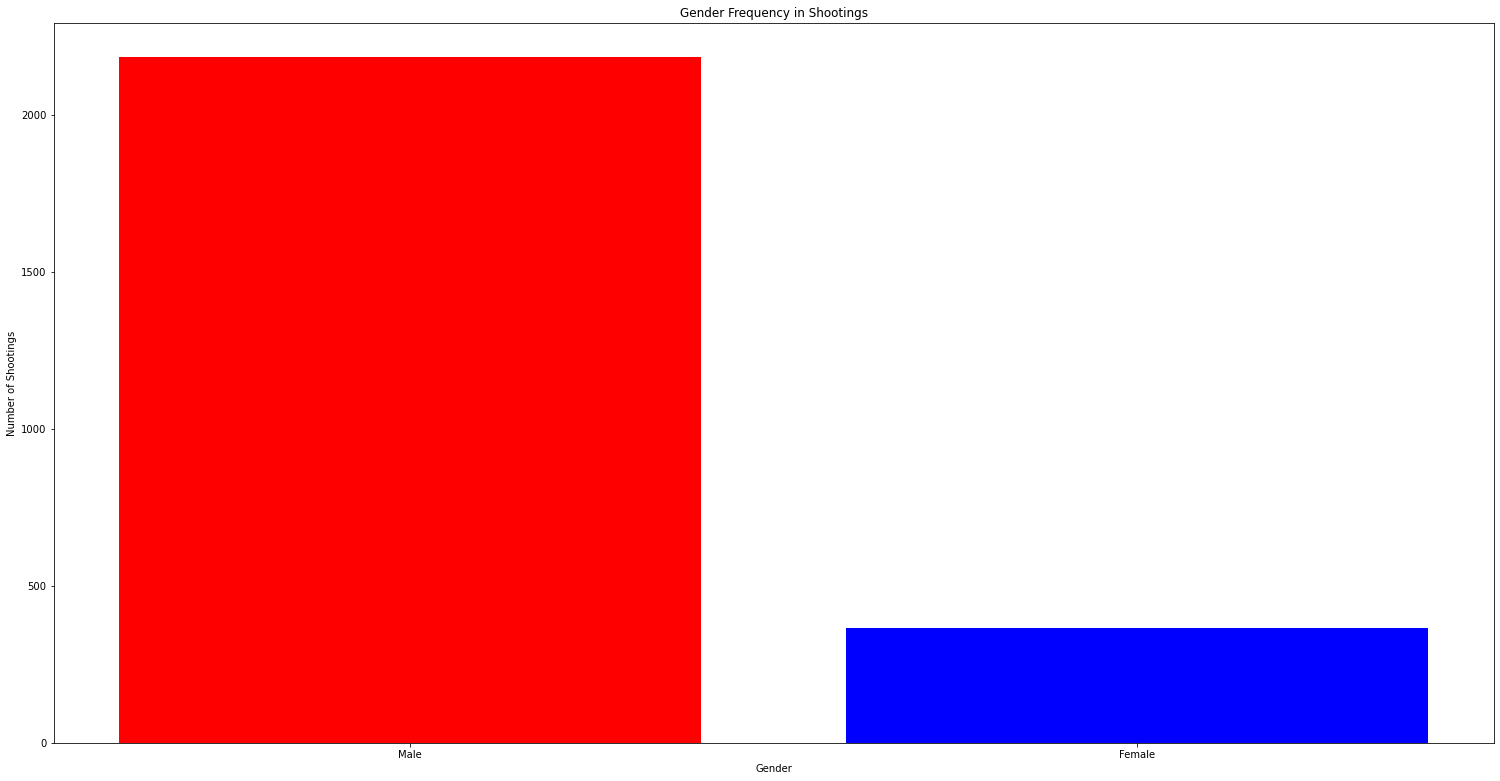

In [29]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(gender_labels,gender_count, color = ['red', 'blue'])
ax.set_title("Gender Frequency in Shootings")
ax.set_xlabel("Gender")
ax.set_ylabel("Number of Shootings")
plt.show()

Another plot we can show is the number of deaths ocurring in each shooting. This will be easy to plot because we already have all of the data we need in our DataFrame.

853.0


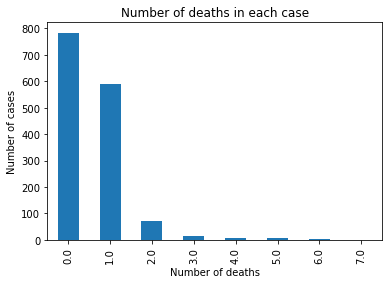

In [30]:
df['n_killed'].value_counts().sort_index().plot.bar()
plt.title('Number of deaths in each case')
plt.xlabel('Number of deaths')
plt.ylabel('Number of cases')
total = df['n_killed'].sum()
print(total)

As can be seen from the above graphs, most gun incidents in the US are on a rather small scale, with 1 gun involved and 1-2 total participants. This answers #2 of our small questions above. However, the sheer number of incidents and number of gun deaths is truly staggering. There were 1,473 incidents and 853 deaths in the 594-day period of time between January 1st, 2013 and August 17, 2014, and that only includes the incidents that did not have missing data where we needed them. We pulled 32,000 entries from the original dataset, and filtered it down to these 1,473 incidents, meaning the actual number should be much, much higher. Even with our conservative count, that still comes down to almost 2.5 incidents and 1.5 people dying at the hands of gun-wielders per day. This answers #1 of our small questions above. 

Another interesting analysis will be to see the number of people killed during shootings in each state. To do this, we can use the pandas function 'sort_values" with the argument "ascending=True" to help us plot a bar graph with ascending values. As we can see below, Texas had the most deaths from shootings with California in a close second.

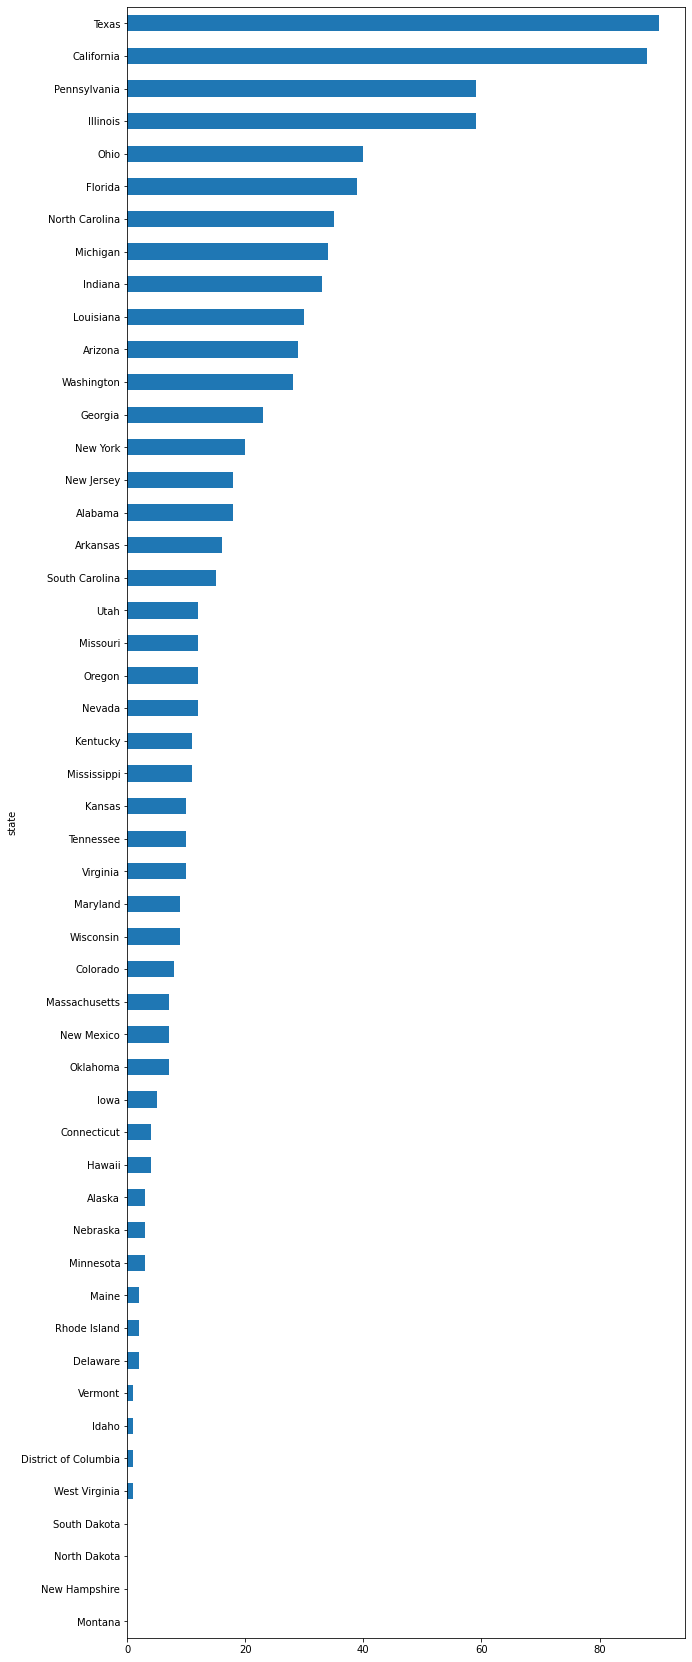

In [31]:
df1 = df.groupby("state")["n_killed"].sum()
df1 = df1.sort_values(ascending=True)
ax = df1.plot.barh(x='n_killed', y='state', figsize=(10,30))

Another analysis we can do on each state if to see the number of guns involved for each shooting. This is the same process as done above for the number of people killed but we substitute in the number of guns instead.

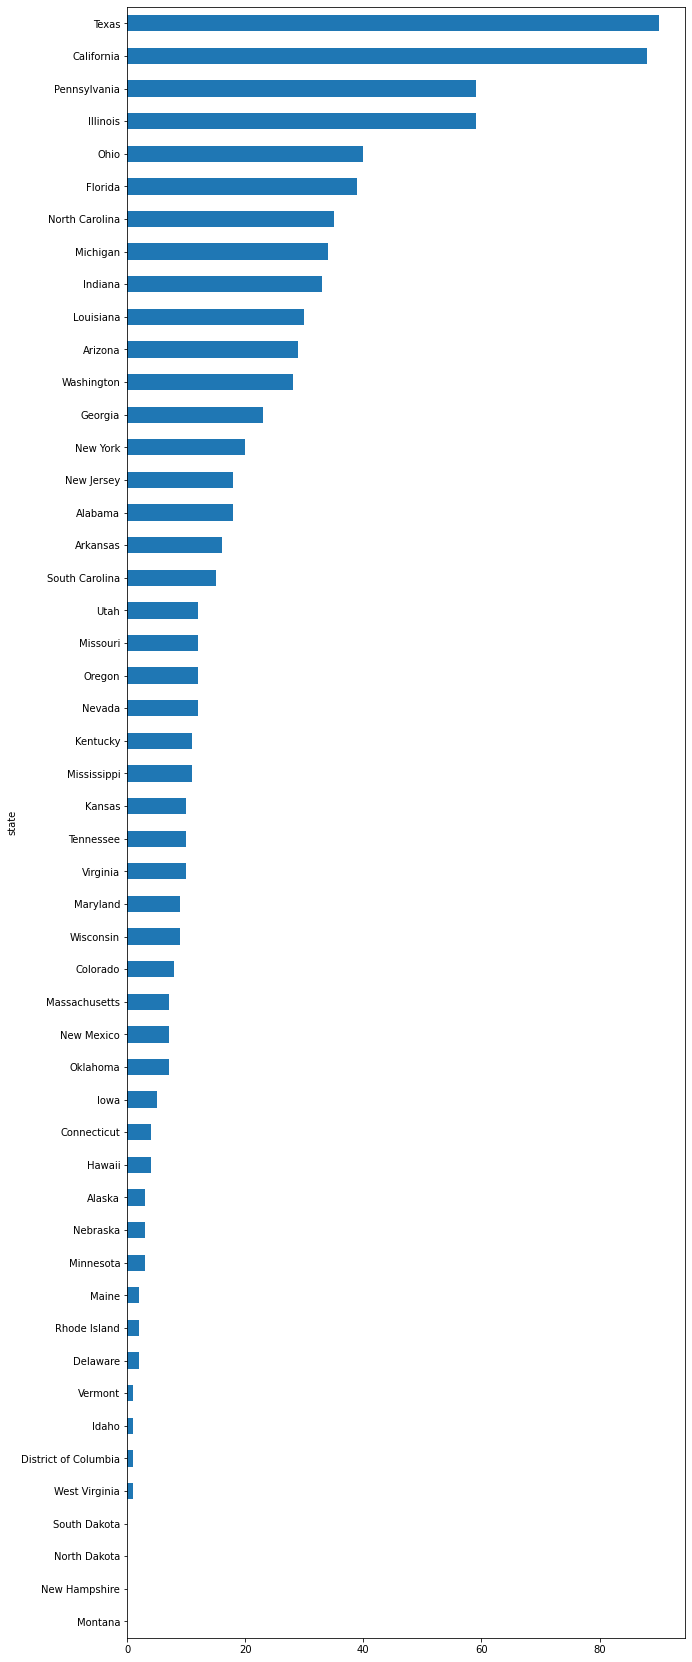

In [32]:
df2 = df.groupby("state")["n_guns_involved"].sum()
df2 = df2.sort_values(ascending=True)
ax = df1.plot.barh(x='n_guns_involved', y='state', figsize=(10,30))

## Hypothesis Testing and Linear Regression

Now that we have visualized our data with plots, we can move on to performing hypothesis testing and linear regression on the dataset. These two things will help us learn more about our data by performing machine learning on them. To start, we will import two new modules to aid us with these tasks. 

The first thing we want to learn about our data is we want to see if there is a relationship between the number of guns involved in a shooting and the number of deaths. To do this, we will compute a regression analysis on these two columns in our dataset. We can then plot this regression line to visually see if there is a relationship.

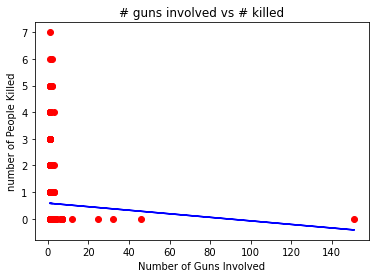

# Killed = -0.0066576725445646485 * # guns involved + 0.5871346894933831


In [39]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

X = df[['n_guns_involved']]
y = df[['n_killed']]

# Perform linear regression analysis
regressor = LinearRegression()
regressor.fit(X, y)

# Plot the regression line
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('# guns involved vs # killed')
plt.xlabel("Number of Guns Involved")
plt.ylabel("number of People Killed")
plt.show()

print("# Killed =",regressor.coef_[0][0],"* # guns involved +",regressor.intercept_[0])

Hmm, this doesn't look promising. The line does not really seem to fit the plot well at all. Just to double-check, let us run an ANOVA test, which gives the P-value needed to see if the linear relationship between the dependent and independent variables is statistically significant.

In [40]:
model_guns = smf.ols(formula='n_killed ~ n_guns_involved', data=df).fit()
result = sm.stats.anova_lm(model_guns, typ=2)
result

,sum_sq,df,F,PR(>F)
n_guns_involved,1.171796,1.0,1.903426,0.167905
Residual,906.199304,1472.0,NaN,NaN


Just as we thought. The P-value given, 0.168, is much greater than the commonly-accepted threshhold alpha of 0.05, which means that there is no significant linear relationship between the number of people killed and the number of guns involved. Let us try to find another variable that has a linear relationship that better predicts the number of people killed.

Let us try the state in which the incident took place:

In [25]:
model_state = smf.ols(formula='n_killed ~ state', data=df).fit()
result = sm.stats.anova_lm(model_state, typ=2)
result

,sum_sq,df,F,PR(>F)
state,82.965538,49.0,2.924629,1.622825e-10
Residual,824.405561,1424.0,NaN,NaN


The P-value given by running ANOVA on the linear relationship between the state in which the incident took place and the number of people killed is much lower than the alpha of 0.05. Thus, the linear relationship between the two variables is statistically significant, and the state is much better predictor of the number of people killed.